##**Capstone Project: Predictive Modelling for the likelihood of Diabetes**

**Project Introduction**

The Diabetes Prediction Project leverages a comprehensive dataset containing both medical and demographic information from patients to develop a machine learning model capable of predicting the likelihood of diabetes. The dataset includes essential features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c levels, and blood glucose levels. By analyzing these features, the project aims to create predictive models that can accurately identify patients who may be at risk of developing diabetes.

This project has significant implications for healthcare. Early and accurate identification of at-risk patients allows healthcare professionals to take proactive measures, offering timely intervention and personalized treatment plans. This approach can help prevent the onset of diabetes or manage its progression more effectively, improving patient outcomes and overall healthcare efficiency.

This project will help the healthcare expertise to address the growing challenge of diabetes, aiming to make a positive impact on public health.

### **Dataset Overview:**

The dataset used for this project consists of 100,000 entries, with total of 9 columns which contain the following:

1. **gender**: The gender of the individual (e.g., Male, Female).
2. **age**: The age of the individual (in years).
3. **hypertension**: Indicator of hypertension (1 for yes, 0 for no).
4. **heart_disease**: Indicator of heart disease (1 for yes, 0 for no).
5. **smoking_history**: History of smoking (various status like 'never', 'current', etc.).
6. **bmi**: Body Mass Index (numeric value).
7. **HbA1c_level**: Level of HbA1c (glycated hemoglobin, numeric value).
8. **blood_glucose_level**: Blood glucose level (numeric value).
9. **diabetes**: Target variable indicating diabetes status (1 for diabetic, 0 for non-diabetic).



 To  be able to achieve this, the following process will be followed:

**1. Data Collection and Preparation:** The first step to be taken is to import the dataset and libraries needed. followed by an initial inspection of data to understand the structure and characteristics of the data. Data cleaning will be conducted by handling missing values, converting variables to appropriate data types, and dropping irrelevant features if any.

**2. Exploratory Data Analysis (EDA):** I will explore the dataset to generate meaningful insights and uncover patterns in the data, utilizing visualizations to enhance understanding. This phase is crucial in revealing relationships between the features and the target variable (diabetes).

**3. Data Preprocessing and Feature Engineering:** Data preprocessing steps will include encoding categorical variables, handling missing values, and scaling numerical features. Additionally, feature engineering techniques.

**4. Model Development:** The dataset will be split into training and test sets to develop and evaluate the model. Various machine learning algorithms, such as Logistic Regressionand  decision trees will be explored.

**5. Model Evaluation and Interpretation:** The model’s performance will be evaluated using metrics like accuracy, precision, recall, F1 score, and ROC-AUC. Visual tools like confusion matrices and ROC curves will be generated to assess how well the model can predict the likelihood of diabetes.

**6. Summary and Recommendations:** Finally, the project will summarize key insights from the model evaluation. I  will discuss insights drawn fom the result, model’s effectiveness, limitations, and potential areas for improvement.

By the end of this project, i will deliver a predictive model that can predict the likelihood of diabetes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####**Library Importation**

In [2]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

##**Data Importation, Exploration and Cleaning**

In [3]:
# Import datasets
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

In [4]:
# Displaying the first 5 rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
#Checking for info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# Checking the shape
df.shape

(100000, 9)

In [7]:
# Summary Statistics of numerical variables
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
# Check for missing values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [9]:
# Checking for sum of Duplicate values
df.duplicated().sum()

3854

In [10]:
# Removing Duplicate values
df.drop_duplicates(inplace=True)

In [11]:
# verifing change
df.shape

(96146, 9)

## **Exploratory Data Analysis (EDA)**

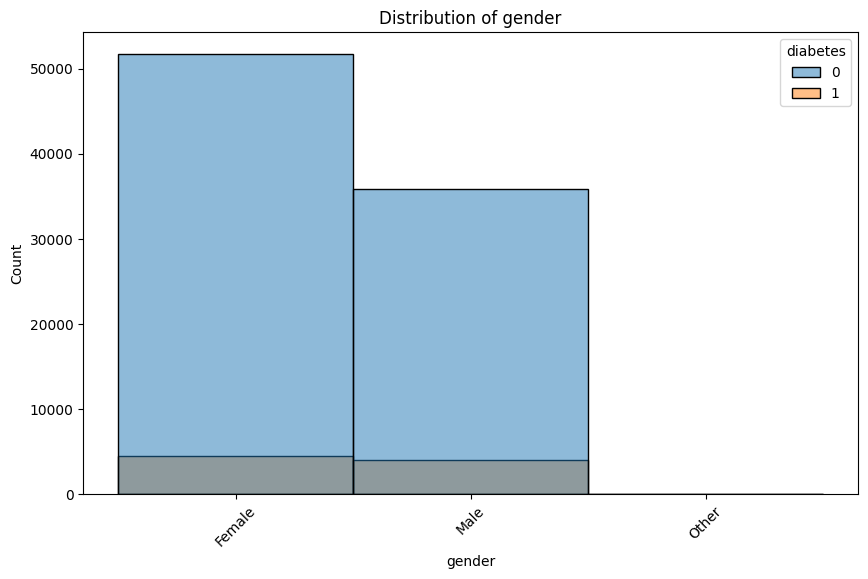

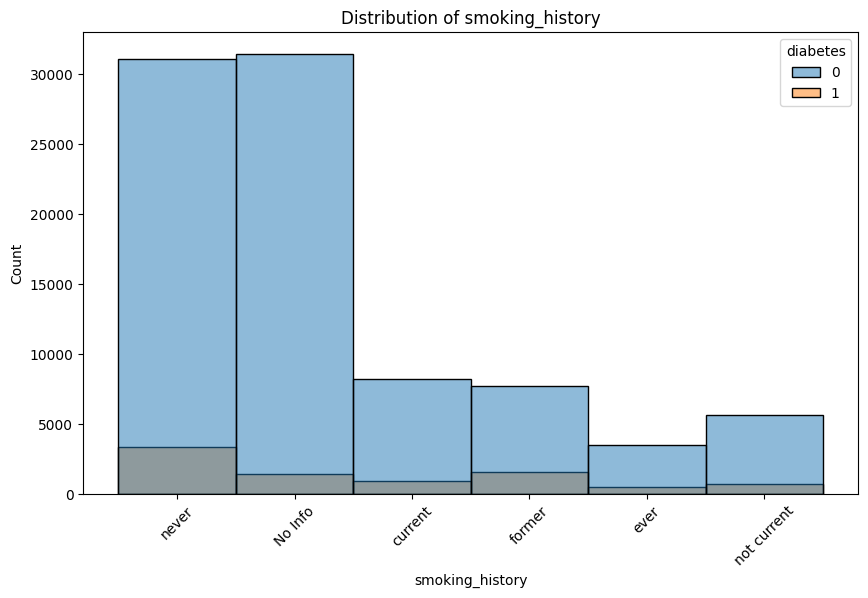

In [12]:
# Plot count for categorical variables
categorical_cols = ['gender', 'smoking_history']

for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, hue='diabetes')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

**Categorical Data Distribution Analysis**

**1. Gender Distribution**

**Blue:** Represents individuals without diabetes outcome (diabetes =0)

**Orange:** Represents individuals with diabetes (diabetes =1)

**Distribution Analysis:**
- The majority of individuals in the dataset are female.
- For both genders, the number of individuals without diabetes is significantly larger than those with diabetes.
- This suggests that gender might be an important factor in diabetes risk, although further analysis is needed.

**2. smoking_history Distribution**

- The categories "No Info" and "Never" have the highest counts, indicating a large number of individuals with unknown or no smoking history.
- Among those with smoking history, "Current," "Former," and "Ever" categories show a higher proportion of individuals with diabetes compared to "Never" and "No Info."
- This implies a potential association between smoking history and diabetes risk.

**Insights**

- Gender and smoking history are potentially relevant features for predicting diabetes.
- The distributions reveal imbalances in certain categories, such as the dominance of "No Info" in smoking history.

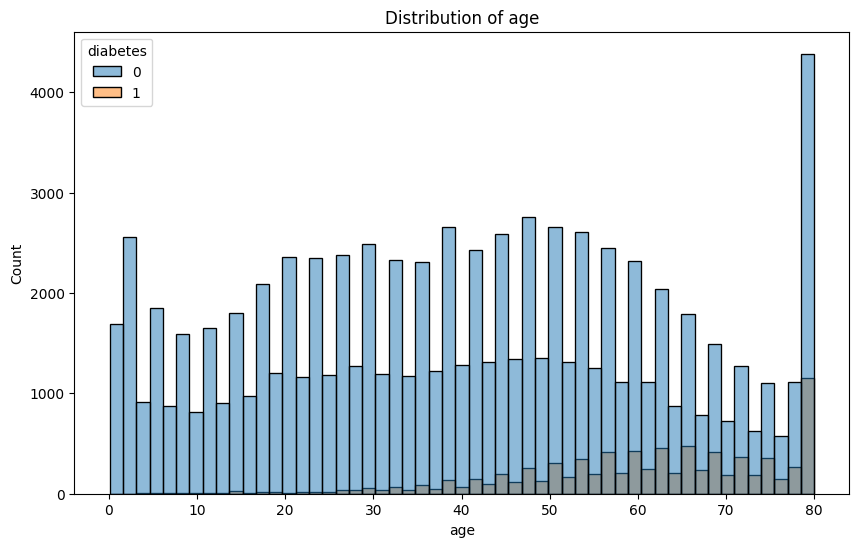

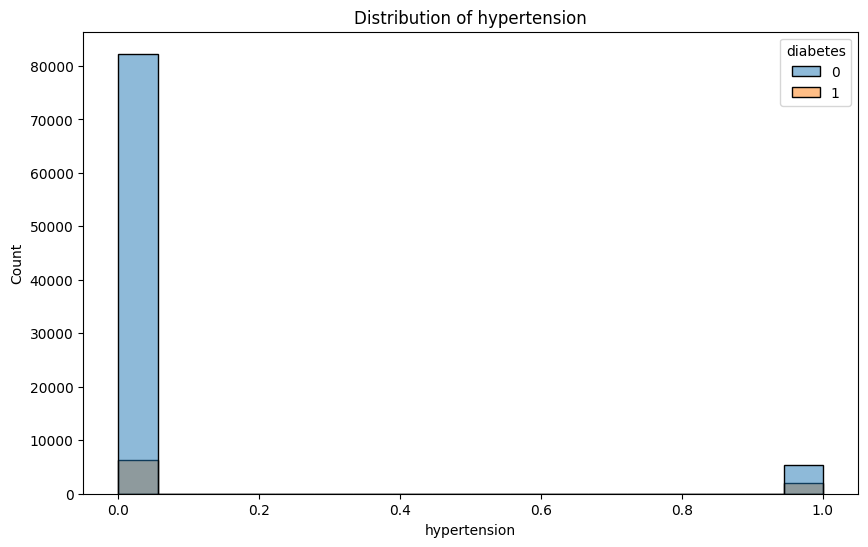

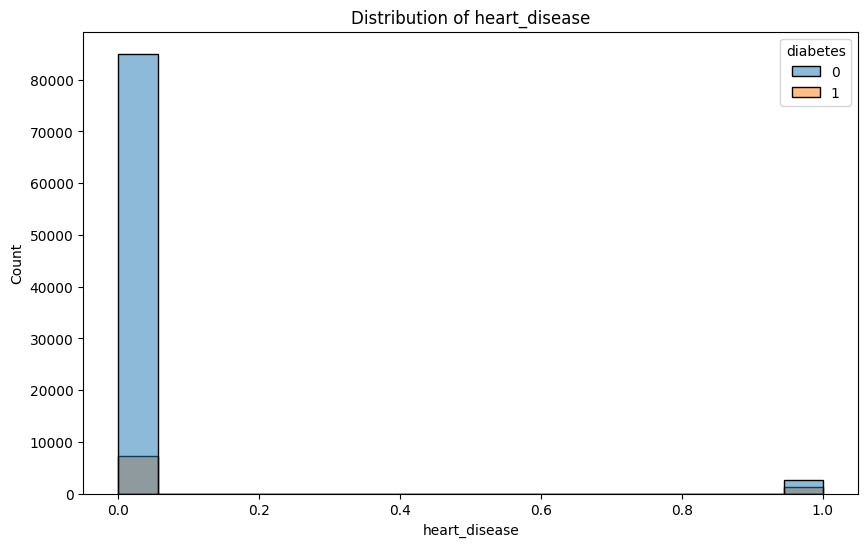

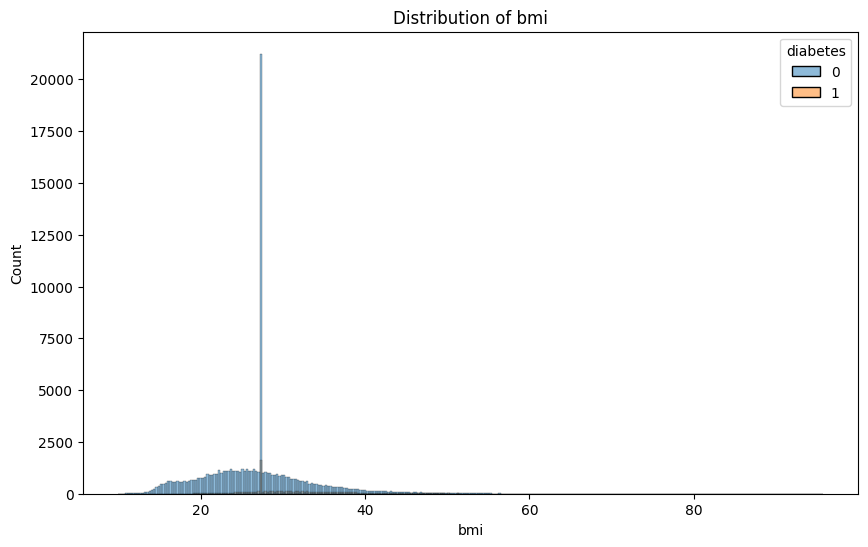

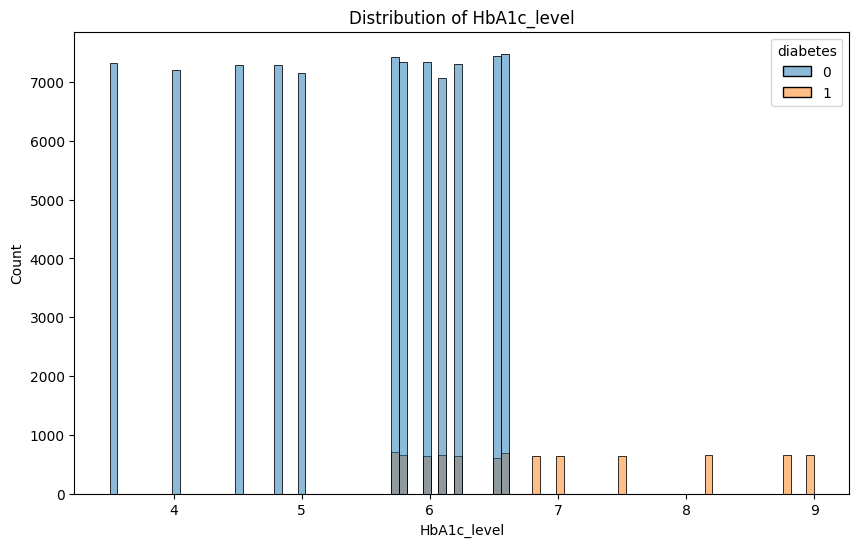

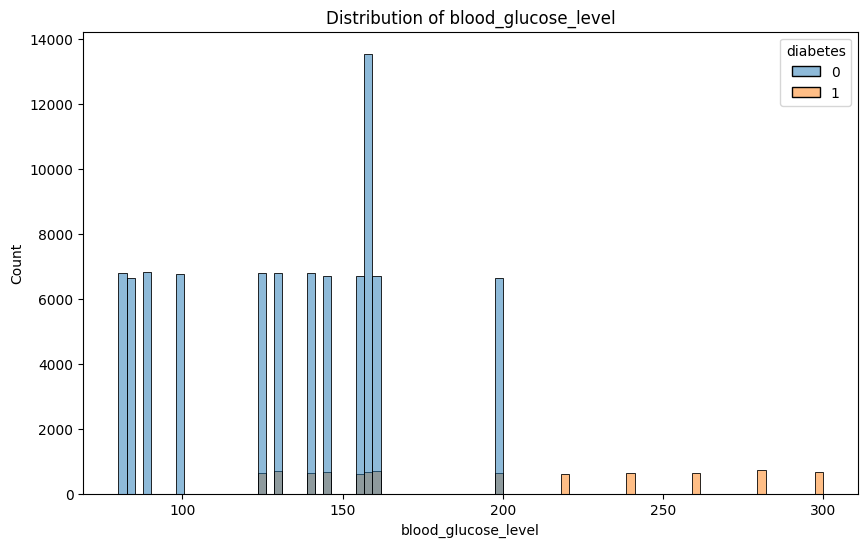

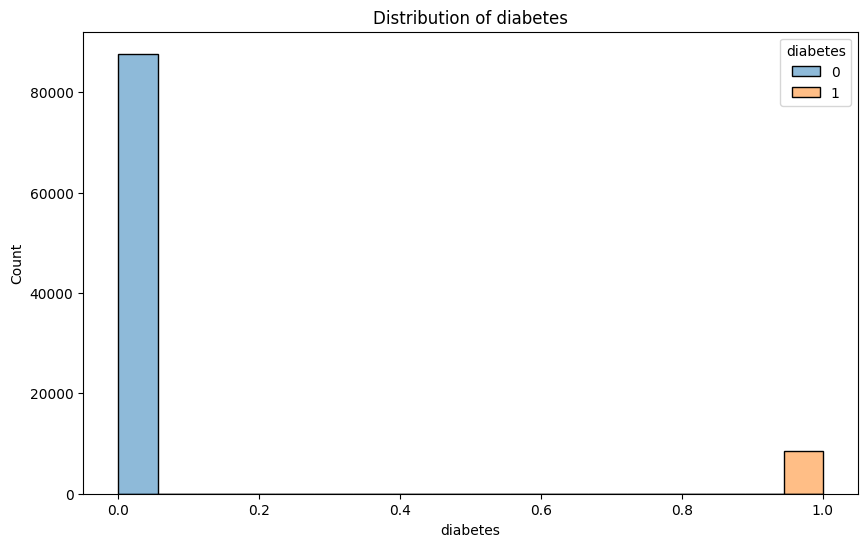

In [13]:
# Plot histograms of numerical variables
numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, hue='diabetes')
    plt.title(f'Distribution of {col}')
    plt.show()

**Numerical Data Distribution Analysis**


**Age**

 - **Distribution:** The age distribution shows a higher concentration of individuals in the younger age groups.

 - **Description:** However, the prevalence of diabetes appears to increase with age, suggesting a positive correlation.

**BMI**
 - **Distribution:** The BMI distribution is slightly skewed to the right.

- **Description:** Individuals with higher BMI values tend to have a greater likelihood of diabetes, indicating a positive correlation.

**HbA1c_level**

   - **Distribution:** The HbA1c_level distribution shows a clear distinction between individuals with and without diabetes.
  
- **Description:** Higher HbA1c levels are strongly associated with diabetes.


**Blood_glucose_level**
  - **Distribution:** Similar to HbA1c_level, the blood_glucose_level distribution reveals a significant difference between the two groups.

- **Description:** Elevated blood glucose levels are indicative of diabete
Insights:

Age, BMI, HbA1c_level, and blood_glucose_level are all potentially important predictors of diabetes.
This distributions provide evidence of positive correlation between the numerical variables and the likelihood of diabetes.

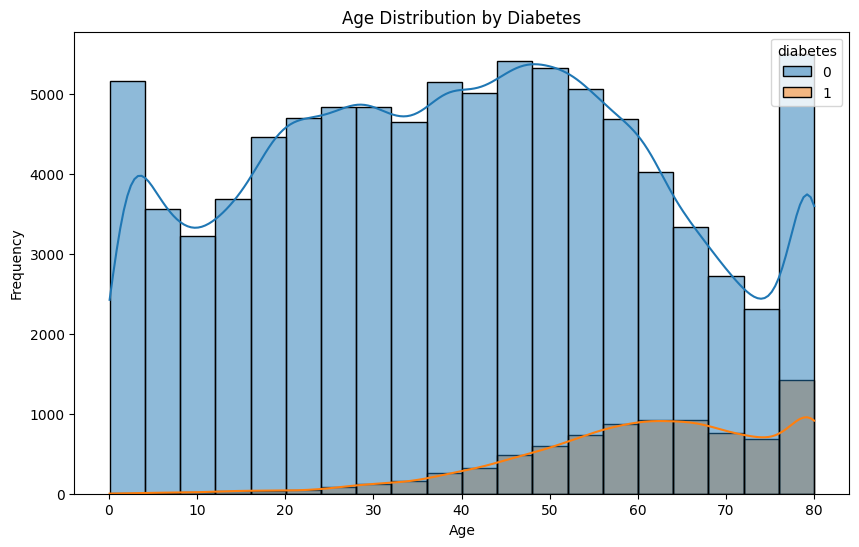

In [14]:
# Age distribution by diabetes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='diabetes', bins=20, kde=True)
plt.title('Age Distribution by Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Observations from Age Distribution by Diabetes**

- Diabetes appears to increase with age.
- Diabetes is less common among younger individuals
- A positive correlation between age and the likelihood of having diabetes. As age increases, the risk of diabetes also tends to increase.


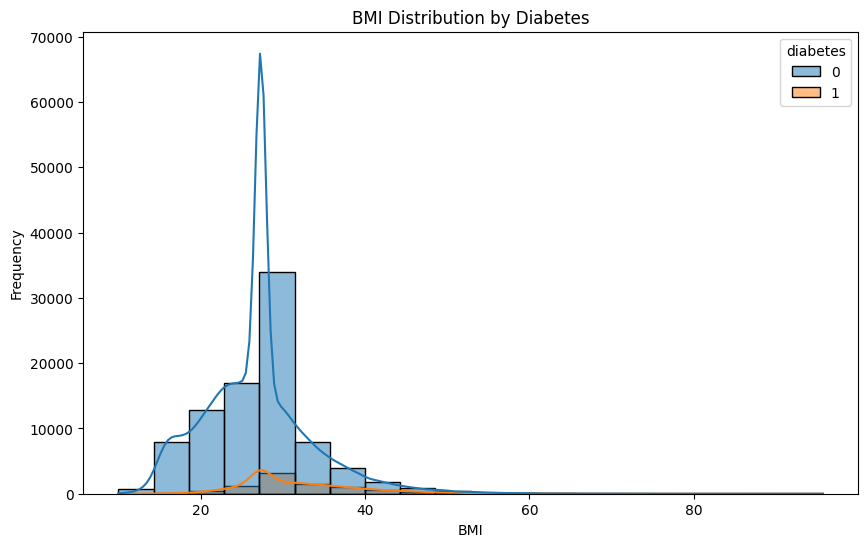

In [15]:
# BMI distribution by diabetes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='diabetes', bins=20, kde=True)
plt.title('BMI Distribution by Diabetes')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

**Observations from BMI Distribution by Diabetes**

- Observations from BMI Distribution by Diabetes
- There is some overlap between the BMI distributions of individuals with and without diabetes. This indicates that BMI alone might not be a perfect predictor of diabetes.
- A positive correlation between BMI and the likelihood of having diabetes. As BMI increases, the risk of diabetes also tends to increase.

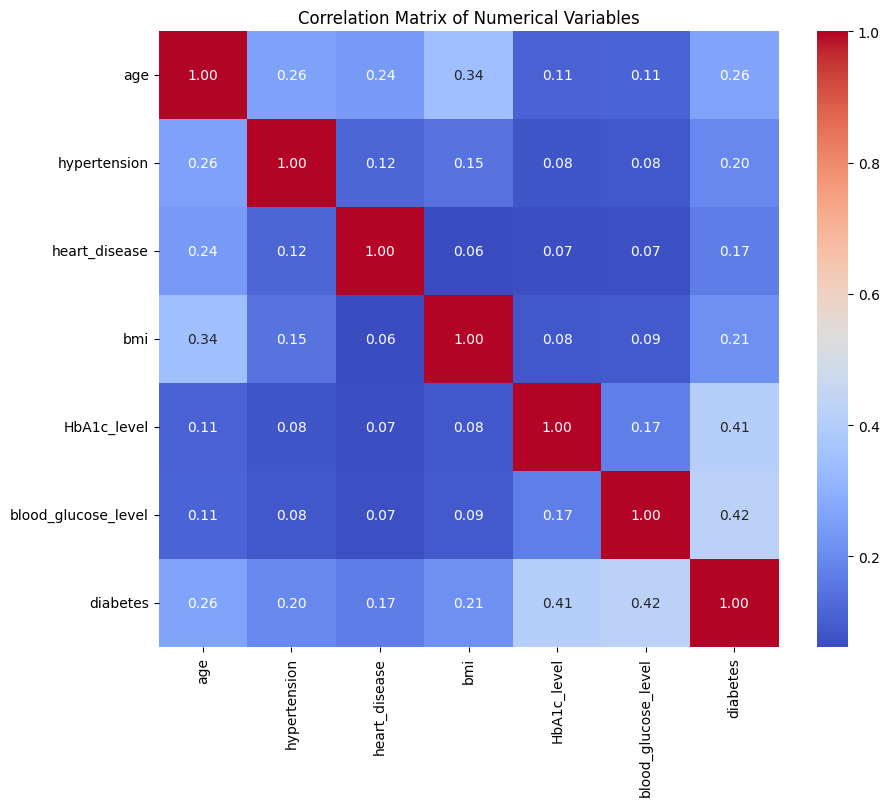

In [16]:
# Correlational matrix for numerical variables
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

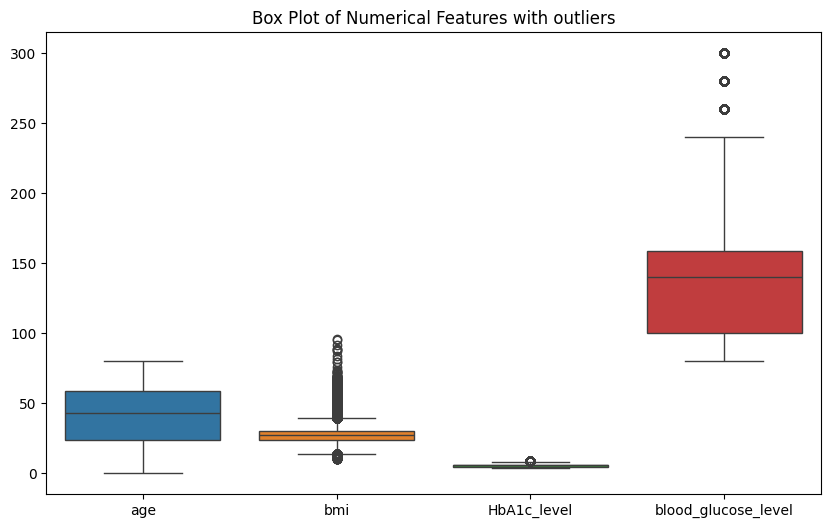

In [17]:
# Checking for outliers
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Plot box plot to show outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plot of Numerical Features with outliers')
plt.show()

In [18]:
# Remove outliers
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

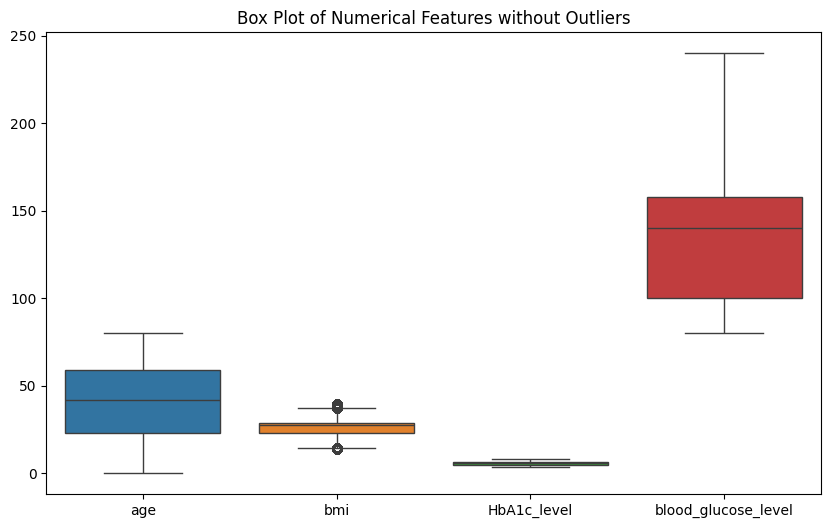

In [19]:
# plot box plot to show removed outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[numerical_features])
plt.title('Box Plot of Numerical Features without Outliers')
plt.show()


###**Data Preprocessing and Feature Engineering**

**Handling Missing Values**
Missing value have been addressed during initial data Inspection

**Encoding Categorical Variables**

In [20]:
# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

In [21]:
# Label encoding For Decision Tree
le_gender = LabelEncoder()
le_smoking = LabelEncoder()

df['gender_encoded'] = le_gender.fit_transform(df['gender'])
df['smoking_history_encoded'] = le_smoking.fit_transform(df['smoking_history'])

In [22]:
# Scaling numerical Variables (only for Logistic Regression)
scaler = StandardScaler()
numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [23]:
# check the preprocessed data
df_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


###**Model Development**

In [24]:
# Separating features (X) and target variables (y)
y = df_encoded['diabetes']

In [25]:
# Features for LogisticRegression (using df_encoded for one hot encoded)
X_logistic = df_encoded.drop(columns=['diabetes'])

In [26]:
# Features for Decision Tree (using df for label encoded)
X_decision_tree = df.drop(columns=['diabetes'])

In [27]:
# Splitting the data
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y, test_size=0.2, random_state=42)
X_train_decision_tree, X_test_decision_tree, y_train_decision_tree, y_test_decision_tree = train_test_split(X_decision_tree, y, test_size=0.2, random_state=42)

In [28]:
# Check the shape of X_train_logistic and y_train_logistic to ensure they have the same number of sample
X_train_logistic.shape, y_train_logistic.shape

((76916, 13), (76916,))

In [29]:
# Check the shape of X_train_decision_tree and y_train_decision_tree to ensure they have the same number of sample
X_train_decision_tree.shape, y_train_decision_tree.shape

((76916, 10), (76916,))

###**Model Selection and Training**

**Using Logistic Regression Model**

In [30]:
# Initializing the logistic regression model
logistic_reg = LogisticRegression(class_weight='balanced')

In [31]:
# Training the logistic regression model
logistic_reg.fit(X_train_logistic, y_train_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [32]:
# Making predictions on the test set
logistic_predictions = logistic_reg.predict(X_test_logistic)

In [33]:
# Evaluating the model
logistic_accuracy = accuracy_score(y_test_logistic, logistic_predictions)
logistic_report = classification_report(y_test_logistic, logistic_predictions)

In [34]:
# Print the evaluation metrics
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:\n", logistic_report)

Logistic Regression Accuracy: 0.8851794071762871
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     17509
           1       0.43      0.88      0.58      1721

    accuracy                           0.89     19230
   macro avg       0.71      0.88      0.76     19230
weighted avg       0.94      0.89      0.90     19230



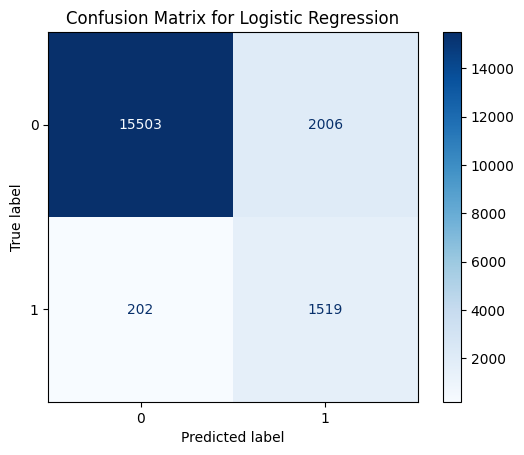

In [35]:
# Confusion matrix for logistic regression
cm = confusion_matrix(y_test_logistic, logistic_predictions)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_reg.classes_)
disp_logistic.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [36]:
# Generate ROC-AUC Score for logistic regression
roc_auc_logistic = roc_auc_score(y_test_logistic, logistic_predictions)

In [37]:
# Calculate fpr and tpr for logistic regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test_logistic, logistic_predictions)

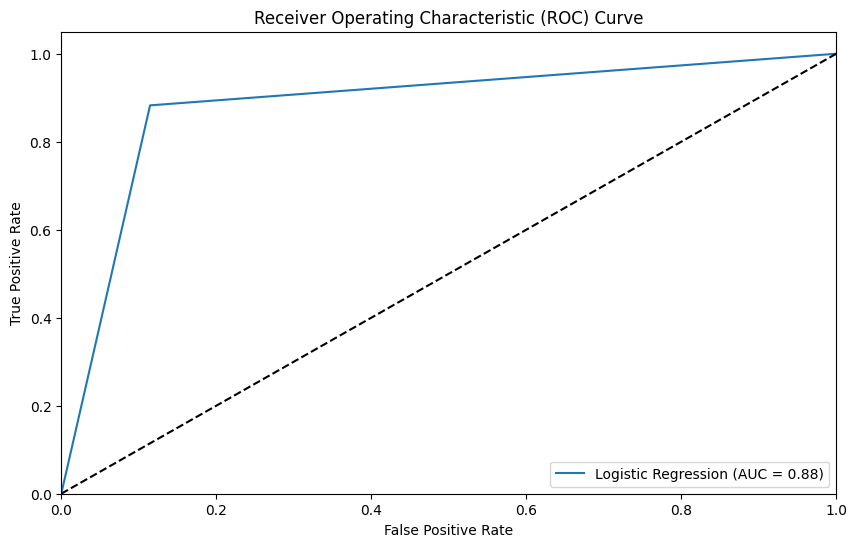

In [38]:
# plot ROC-AUC Score for logistic regression
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Analysing feature importance
feature_importance = pd.DataFrame({'Feature': X_train_logistic.columns, 'Importance': logistic_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

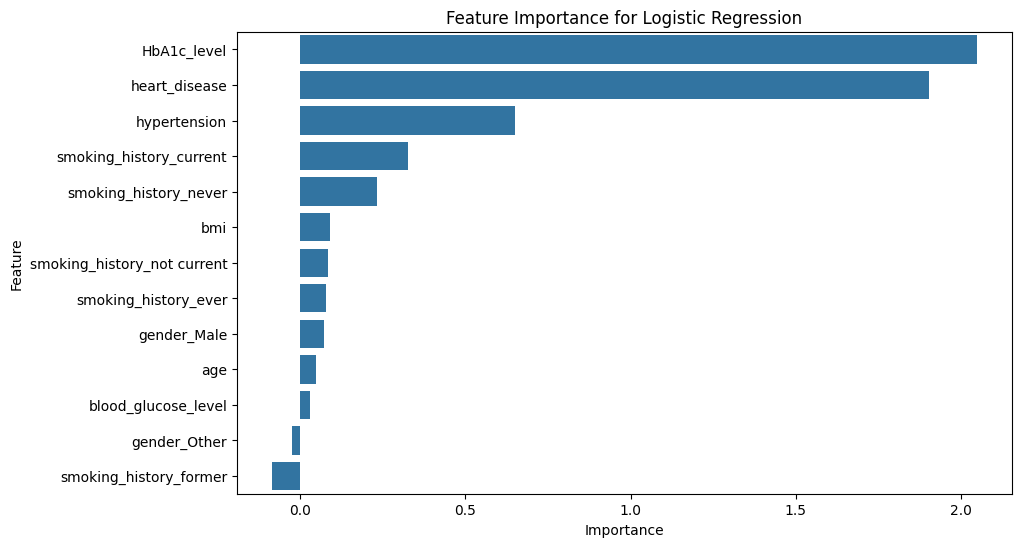

In [40]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Logistic Regression')
plt.show()

**Using Decision Tree Classifier**

In [41]:
# Initializing the Decision tree model
decision_tree_model = DecisionTreeClassifier(class_weight='balanced')

In [42]:
# Iterate through columns of X_train_decision_tree
for col in X_train_decision_tree.columns:
    if X_train_decision_tree[col].dtype == 'object':  # Check if the column contains string values
        encoder = LabelEncoder()
        X_train_decision_tree[col] = encoder.fit_transform(X_train_decision_tree[col])

# Check if the column contains string values
X_train_decision_tree[col] = encoder.fit_transform(X_train_decision_tree[col])

In [43]:
# training the model decision tree
decision_tree_model.fit(X_train_decision_tree, y_train_decision_tree)

DecisionTreeClassifier(class_weight='balanced')

In [44]:
# Iterate through columns of X_test_decision_tree and apply Label Encoding if needed
for col in X_test_decision_tree.columns:
    if X_test_decision_tree[col].dtype == 'object':
        encoder = LabelEncoder()
        X_test_decision_tree[col] = encoder.fit_transform(X_test_decision_tree[col])

In [45]:
# Making predictions
decision_tree_predictions = decision_tree_model.predict(X_test_decision_tree)


In [46]:
# Evaluating the model
decision_tree_accuracy = accuracy_score(y_test_decision_tree, decision_tree_predictions)
decision_tree_report = classification_report(y_test_decision_tree, decision_tree_predictions)

In [47]:
 # Print the evaluation metrics
 print("Decision Tree Accuracy:", decision_tree_accuracy)
 print("Decision Tree Classification Report:\n", decision_tree_report)

Decision Tree Accuracy: 0.9512220488819553
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.72      0.73      0.73      1721

    accuracy                           0.95     19230
   macro avg       0.85      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



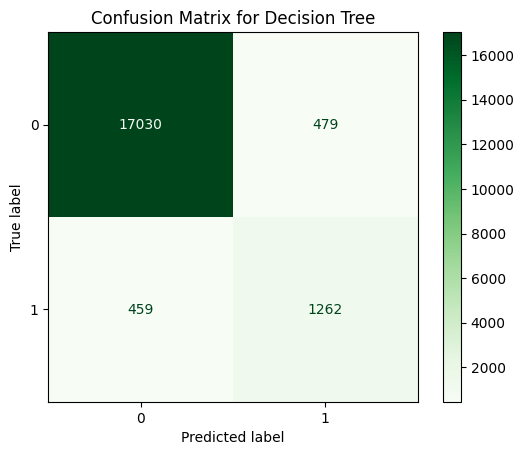

In [48]:
# Confusion matrix for decision tree model
cm_dt = confusion_matrix(y_test_decision_tree, decision_tree_predictions)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=decision_tree_model.classes_)
disp_dt.plot(cmap='Greens')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


In [49]:
# Generate ROC-AUC Score for decision tree model
roc_auc_dt = roc_auc_score(y_test_decision_tree, decision_tree_predictions)

In [50]:
# Calculate fpr and tpr for decision tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_decision_tree, decision_tree_predictions)

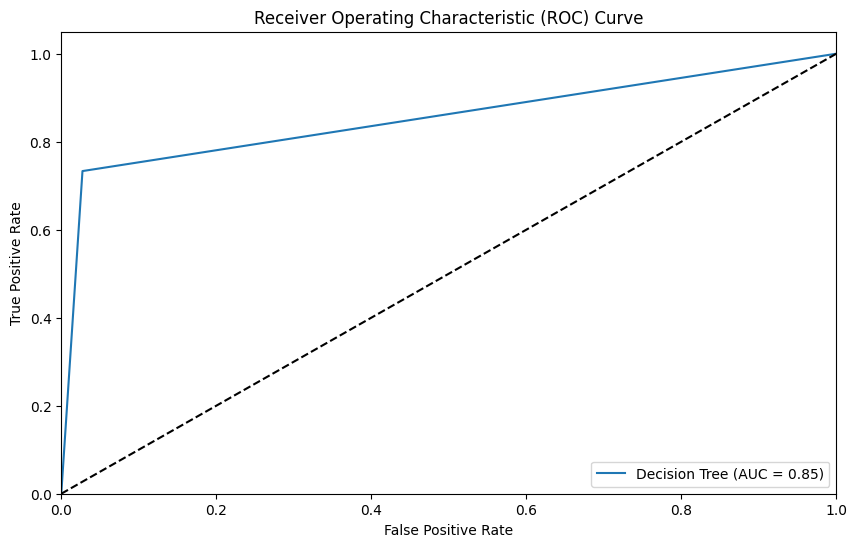

In [51]:
# plot ROC-AUC Score for decision tree model
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
# Analysing feature importance
feature_importance_dt = pd.DataFrame({'Feature': X_train_decision_tree.columns, 'Importance': decision_tree_model.feature_importances_})
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

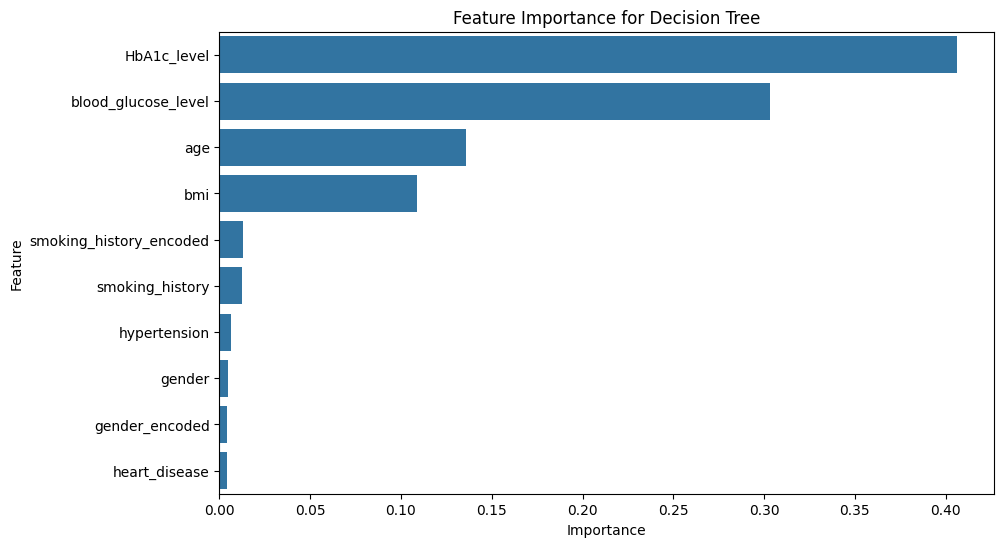

In [53]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt)
plt.title('Feature Importance for Decision Tree')
plt.show()

In [54]:
# Compiling the results of both models into a summary
summary = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [logistic_accuracy, decision_tree_accuracy],
    'ROC-AUC Score': [roc_auc_logistic, roc_auc_dt]
}

In [55]:
# Printing the results of both models into a summary
summary_df = pd.DataFrame(summary)
summary_df

,Model,Accuracy,ROC-AUC Score
0,Logistic Regression,0.885179,0.884028
1,Decision Tree,0.951222,0.852969


## **Model Performance**

This study assessed the performance of two machine learning models, the Logistic Regression and Decision Tree Classifier, in predicting the likelihood of diabetes. The aim  was to develop a machine learning model that can accurately predict the likelihood of diabetes.

**Evaluation Metrics**

**1. Logistic Regression:**
- Accuracy: The logistic regression model achieved an accuracy of 88.52% (0.8851).
- Precision:  Class 0: 0.99, Class 1: 0.43
- Recall:     Class 0: 0.89, Class 1: 0.88
- F1-Score:   Class 0: 0.93, Class 1: 0.58
- ROC-AUC:    0.88

**2. Decision Tree Classifier:**
- Accuracy:The decision tree model achieved an accuracy of 95.14% (0.9514).
- Precision:  Class 0: 0.97, Class 1: 0.73
- Recall:   	Class 0: 0.97, Class 1: 0.73
-	F1-Score: 	Class 0: 0.97, Class 1: 0.73
- ROC-AUC:    0.85

The model performs significantly better on Class 0 compared to Class 1, as evident from precision, recall, and F1-score.







####**Effectiveness of Predicting the likelihood of diabetes with Logistic Regression Model**

**Strengths**

- High recall (0.88) for detecting diabetes ensures fewer false negatives, which is critical in healthcare.

**Weakness**

- Low precision for predicting diabetes (0.43) leads to many false positives, which could create unnecessary interventions and costs.

**How the Model can be improved**

**1. Threshold Tuning:** You can adjust the classification threshold to balance recall and precision based on the project’s requirements.

**2. Handle class Imbalance:** You can apply techniques like SMOTE (Synthetic Minority Oversampling Technique) or ADASYN to oversample the diabetic cases. Or alternatively undersample the majority class (non-diabetics) to improve balance.

**3. Feature Engineering:** Existing data can be combined to reveal new insights. Data format can be changed to make it more useful. Uncover hidden patterns in your data. Help your model understand data better.

**4. Regularization:** You can use L1 or L2 regularization to improve generalization by reducing overfitting to the training data.

####**Effectiveness of Predicting the likelihood of diabetes with DecisionTree Classifier Model**

**Strengths**

- Higher precision (0.73) for predicting diabetes means fewer false positives, ensuring fewer unnecessary interventions.

**Weakness**

- Lower recall (0.73) compared to Logistic Regression means more false negatives, which is unacceptable in healthcare where missed diabetic cases can have severe consequences.


**How the Model can be improved**

**1. Tree Pruning:** You can prune the tree to reduce overfitting and improve generalization. Set limits on the tree depth, minimum samples per split, or minimum samples per leaf.

**2. Threshold Adjustment:** Modify the decision thresholds for classifying diabetes (like in Logistic Regression). This can improve recall by capturing more diabetic cases

**3. Cost-Sensitive Learning:** Assign a higher misclassification cost to false negatives (missing diabetic patients) during model training.

**4. Switch to Ensemble Methods:** Use Random Forest or Gradient Boosting to improve performance.These methods combine multiple decision trees and tend to generalize better while handling imbalanced datasets effectively.






###**Model Recommendation**

- Logistic Regression is better suited if recall (capturing as many diabetic cases as possible) is your top priority.
- Decision Tree is better suited if precision (minimizing false alarms) is more critical.

**For optimal performance:**

- Use Logistic Regression as your baseline model.
- Improve the Decision Tree using ensemble methods (Random Forest or Gradient Boosting) to balance recall and precision.
- Evaluate performance with metrics like Precision-Recall Curve and ensure the final model aligns with your project’s healthcare objectives.
